
## <font color='green'> hh's NASA Review: </font> 
#### Three files:
#### 1. Fire_V1
https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/v1-vnp14imgt#ed-viirs-375m-attributes

#### 2. Fire_M6 - requested MODIS data (M6 stands for MODIS Collection 6; MODIS NRT files:(MCD14DL) MODIS Active Fire and Thermal Anomalies product processed by LANCE / FIRMS
https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl#ed-firms-attributes 
https://earthdata.nasa.gov/faq/firms-faq

#### 3. FireJ1V-C2 - 
##### IIRS 375m NRT files:(VJ114IMGDL) VIIRS Active Fire and Thermal Anomalies product from NOAA-20 (JPSS-1) processed by LANCE / FIRMS

Note:
The MODIS and VIIRS fire files are split to ensure users clearly distinguish between these two data sources. Should you wish to combine the datasets you will still be able to distinguish the source using the Collection / Version field. 

See Read Me File in google drive. 

In [1]:
import os
import glob
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

### Merge V1 NASA data into single file, current and archive.

os.chdir('/Users/AlfHaugen/Python/Wildfire_Data/4 NASA/DL_Fire_V1_110068')

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

###combine all files in the list
NASAV1combined = pd.concat([pd.read_csv(f) for f in all_filenames ])
###export to csv
NASAV1combined.to_csv( "NASAV1combined.csv", index=False, encoding='utf-8-sig')

In [4]:
FRPdf = pd.read_csv('/Users/AlfHaugen/Python/Wildfire_Data/4 NASA/DL_Fire_V1_110068/fire_archive_V1_110068.csv')

In [5]:
NASA_V1 = pd.read_csv('/Users/AlfHaugen/Python/Wildfire_Data/4 NASA/DL_Fire_V1_110068/NASAV1combined.csv', dtype={"confidence": object, "type": object})

/Users/AlfHaugen/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
NASA_M6 = pd.read_csv('/Users/AlfHaugen/Python/Wildfire_Data/4 NASA/DL_FIRE_M6_110066/fire_archive_M6_110066.csv')

In [ ]:
NASA_J1V1 = pd.read_csv('/Users/AlfHaugen/Python/Wildfire_Data/4 NASA/DL_FIRE_J1V-C2_110067/fire_nrt_J1V-C2_110067.csv')

In [ ]:
FRPdf.shape

# NASA V1 Data Review

In [7]:
NASA_V1.shape

(10820816, 15)

In [8]:
### Pull year out and make into a new column in dataframe. 
NASA_V1['year'] = NASA_V1['acq_date'].astype(str).str[0:4]

In [9]:
NASA_V1.head()

,acq_date,acq_time,bright_ti4,bright_ti5,confidence,daynight,frp,instrument,latitude,longitude,satellite,scan,track,type,version,year
0,2019-10-01,612,307.3,288.6,n,N,2.3,VIIRS,41.46153,-81.67585,N,0.69,0.74,NaN,1.0NRT,2019
1,2019-10-01,612,312.8,288.3,n,N,2.1,VIIRS,41.45969,-81.67487,N,0.69,0.74,NaN,1.0NRT,2019
2,2019-10-01,612,336.8,287.2,n,N,4.8,VIIRS,34.66630,-80.58686,N,0.55,0.68,NaN,1.0NRT,2019
3,2019-10-01,612,307.7,286.4,n,N,1.7,VIIRS,37.23220,-82.03742,N,0.69,0.74,NaN,1.0NRT,2019
4,2019-10-01,612,297.7,285.9,n,N,2.3,VIIRS,37.22986,-82.04183,N,0.69,0.74,NaN,1.0NRT,2019


In [10]:
NASA_V1.describe()

,acq_time,bright_ti4,bright_ti5,frp,latitude,longitude,scan,track,type
count,1.082082e+07,1.082082e+07,1.082082e+07,1.082082e+07,1.082082e+07,1.082082e+07,1.082082e+07,1.082082e+07,1.059404e+07
mean,1.435303e+03,3.278395e+02,2.920592e+02,1.228721e+01,3.950159e+01,-1.075576e+02,4.624647e-01,4.857055e-01,4.513891e-01
std,5.632978e+02,2.117195e+01,1.240298e+01,3.778120e+01,9.644486e+00,2.112151e+01,9.027072e-02,1.179532e-01,9.152609e-01
min,0.000000e+00,2.080000e+02,0.000000e+00,0.000000e+00,1.891902e+01,-1.788074e+02,3.200000e-01,3.600000e-01,0.000000e+00
25%,9.080000e+02,3.071000e+02,2.848000e+02,1.700000e+00,3.312107e+01,-1.197162e+02,3.900000e-01,3.800000e-01,0.000000e+00
50%,1.735000e+03,3.308000e+02,2.910000e+02,4.000000e+00,3.849042e+01,-1.041523e+02,4.400000e-01,4.500000e-01,0.000000e+00
75%,1.942000e+03,3.430000e+02,2.984000e+02,9.500000e+00,4.434374e+01,-9.016537e+01,5.100000e-01,5.700000e-01,0.000000e+00
max,2.359000e+03,3.670000e+02,3.800000e+02,8.065400e+03,7.132837e+01,1.795834e+02,8.000000e-01,7.800000e-01,3.000000e+00


In [11]:
NASA_V1['year'].unique()

array(['2019', '2012', '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype=object)

In [75]:
Nv1frp = NASA_V1[(NASA_V1.frp < 200)]

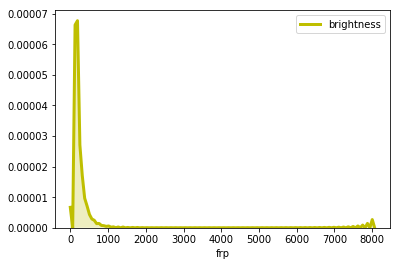

In [72]:
sns.distplot(NASA_V1['frp'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3, 'color': 'Y'}, 
                  label = 'brightness')

Text(0, 0.5, '# of Fire Instances')

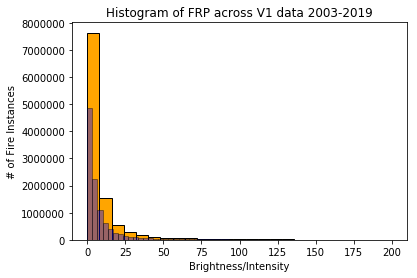

In [85]:
# matplotlib histogram
plt.hist(Nv1frp['frp'], color = 'orange', edgecolor = 'black',
         bins = int(180/7))

# seaborn histogram
sns.distplot(Nv1frp['frp'], hist=True, kde=False, 
             bins=int(180/3), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of FRP across V1 data 2003-2019')
plt.xlabel('Brightness/Intensity')
plt.ylabel('# of Fire Instances')

# NASA M6 Data Review

In [8]:
NASA_M6['year'] = NASA_M6['acq_date'].astype(str).str[0:4]

In [9]:
NASA_M6['year'].unique()

array(['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'], dtype=object)

In [10]:
NASA_M6.shape

(2159468, 16)

In [11]:
NASA_M6.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,year
0,38.8142,-93.5539,300.8,1.0,1.0,2003-01-01,423,Terra,MODIS,33,6.2,267.0,10.4,N,0,2003
1,19.3739,-155.1130,318.8,3.1,1.7,2003-01-01,914,Terra,MODIS,97,6.2,288.7,98.4,N,2,2003
2,19.3723,-155.1197,316.0,3.1,1.7,2003-01-01,914,Terra,MODIS,90,6.2,288.3,85.0,N,2,2003
3,19.3589,-155.1107,325.2,3.1,1.7,2003-01-01,914,Terra,MODIS,100,6.2,292.0,131.8,N,2,2003
4,19.3573,-155.1174,319.0,3.1,1.7,2003-01-01,914,Terra,MODIS,97,6.2,290.3,97.3,N,2,2003


In [12]:
NASA_M6['frp'].count()

2159468

In [13]:
x = NASA_M6.dtypes
print(x)

latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence      int64
version       float64
bright_t31    float64
frp           float64
daynight       object
type            int64
year           object
dtype: object


In [14]:
NASA_M6[['brightness', 'frp']].agg(['mean','min','max','count'])

,brightness,frp
mean,3.253025e+02,6.540101e+01
min,3.000000e+02,-5.920000e+01
max,5.065000e+02,1.437650e+04
count,2.159468e+06,2.159468e+06


In [15]:
b1 = NASA_M6[(NASA_M6.brightness > 505)].sort_values(by='brightness')

In [16]:
print(b1)

         latitude  longitude  brightness  scan  track    acq_date  acq_time  \
1984419   19.4905  -154.8361       505.1   1.3    1.1  2018-07-14      1153   
902655    65.9560  -146.8973       505.1   1.6    1.2  2009-07-21      2125   
1822593   37.7244  -112.7551       505.1   1.0    1.0  2017-06-22      2041   
1210295   33.3665  -108.5492       505.1   1.2    1.1  2012-05-23      2040   
1370513   43.4694  -115.4580       505.1   1.5    1.2  2013-08-10      2108   
1468939   42.0365  -122.2374       505.2   1.1    1.1  2014-08-02      2126   
1974542   19.4879  -154.8892       505.2   1.0    1.0  2018-06-17      1211   
1822592   37.7171  -112.7419       505.2   1.0    1.0  2017-06-22      2041   
1734609   44.2707  -118.3207       505.2   1.0    1.0  2016-08-27      2101   
1980891   19.4980  -154.8340       505.3   1.0    1.0  2018-07-04      2348   
1103490   33.9607  -109.1333       505.3   1.1    1.1  2011-06-06      2040   
1468948   42.0538  -122.2549       505.4   1.1    1.

Text(0, 0.5, '# of Fire Instances')

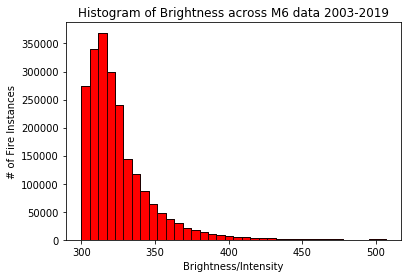

In [23]:
# matplotlib histogram
plt.hist(NASA_M6['brightness'], color = 'red', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(NASA_M6['brightness'], hist=True, kde=False, 
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Brightness across M6 data 2003-2019')
plt.xlabel('Brightness/Intensity')
plt.ylabel('# of Fire Instances')

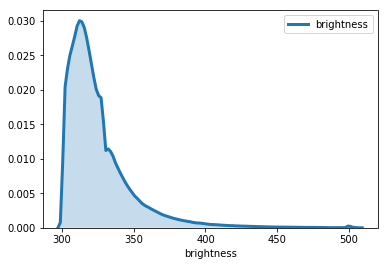

In [17]:
sns.distplot(NASA_M6['brightness'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'brightness')

Text(0, 0.5, '# of Fire Instances')

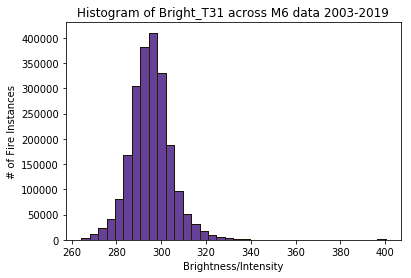

In [24]:
# matplotlib histogram
plt.hist(NASA_M6['bright_t31'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(NASA_M6['bright_t31'], hist=True, kde=False, 
             bins=int(180/5), color = 'orange',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Bright_T31 across M6 data 2003-2019')
plt.xlabel('Brightness/Intensity')
plt.ylabel('# of Fire Instances')

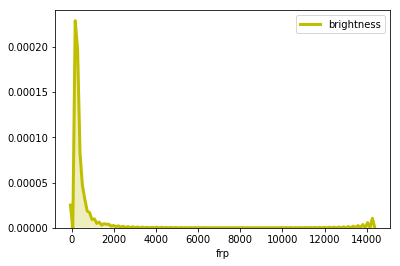

In [22]:
sns.distplot(NASA_M6['frp'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3, 'color': 'Y'}, 
                  label = 'brightness')

In [57]:
### & (NASA_M6.latitude > 40) & (NASA_M6.latitude < 50) & (NASA_M6.longitude < -119) & (NASA_M6.longitude > -126)]  
NM2005 = NASA_M6[(NASA_M6.year > '2004') & (NASA_M6.year < '2006') & (NASA_M6.latitude > 45.7) & (NASA_M6.latitude < 45.99) & (NASA_M6.longitude < -120.18) & (NASA_M6.longitude > -120.8)] 

In [58]:
NM2005.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,year
343878,45.8023,-120.2710,336.1,1.3,1.1,2005-07-23,2040,Aqua,MODIS,83,6.2,318.8,17.3,D,0,2005
344092,45.8270,-120.2290,314.7,1.1,1.1,2005-07-24,608,Terra,MODIS,90,6.2,292.8,15.2,N,0,2005
344093,45.8176,-120.2265,307.7,1.1,1.1,2005-07-24,608,Terra,MODIS,68,6.2,293.2,9.1,N,0,2005
344094,45.8082,-120.2242,318.2,1.1,1.1,2005-07-24,608,Terra,MODIS,96,6.2,293.9,18.6,N,0,2005
344194,45.8062,-120.2258,300.2,1.1,1.0,2005-07-24,1015,Aqua,MODIS,21,6.2,287.7,5.6,N,0,2005


In [59]:
NM2005[['brightness', 'frp']].agg(['mean','min','max','count'])

,brightness,frp
mean,328.964286,36.3
min,300.200000,5.6
max,383.900000,274.9
count,14.000000,14.0


In [60]:
M6large2005 = NASA_M6[(NASA_M6.year == '2005') & (NASA_M6.longitude < -148) & (NASA_M6.latitude > 66.1)]

In [61]:
M6large2005.shape

(9366, 16)

In [71]:
M6large2005.to_csv('/Users/AlfHaugen/Python/Wildfire_Data/m62005large.csv', encoding='utf-8')

In [62]:
xlg = M6large2005[['latitude', 'longitude', 'acq_date']]
xlg[136:220]

,latitude,longitude,acq_date
318850,67.0757,-150.4181,2005-06-15
318904,67.9037,-158.1996,2005-06-16
318905,67.9108,-158.1705,2005-06-16
318927,68.1171,-159.4746,2005-06-16
319165,67.9151,-158.1490,2005-06-16
319166,66.3454,-155.9969,2005-06-16
319167,67.9144,-158.1324,2005-06-16
319168,66.3433,-156.0025,2005-06-16
319169,67.9208,-158.1341,2005-06-16
319170,67.8905,-160.3148,2005-06-16


#def graph_data(path, xkey='doy', ykey='eco'):
data = NASA_M6_2005
xval = data['acq_date']
yval = data['frp']
#Year = emyear2003['year']

fig,axe = plt.subplots()
plt.scatter(xval, yval, alpha=0.7)
plt.ylim([0, data['frp'].max()+100])

plt.ylabel('Emissions of CO')
plt.xlabel('Acq Date')
plt.title('FRP Brightness across time') 
#+ str(Year))

plt.grid(True)
plt.show()

#graph_data(emyear2003) # Or whatever your path is

NM2005[['longitude', 'frp']]

## Sending results of NASA M6 focus area to CSV to file. 
NM2005.to_csv('/Users/AlfHaugen/Python/Wildfire_Data/Predicting-Wildfires/NASA2005WoodGulch.csv', encoding='utf-8')

In [63]:
emdata = pd.read_csv('/Users/AlfHaugen/Python/Wildfire_Data/9 Missoula Emisions Data RDS-2017-0039/Emissions_Year/emissions_year2003to2015.csv')

In [64]:
emyear2005 = emdata[(emdata.year == 2005) & (emdata.latitude > 45.6) & (emdata.latitude < 45.99) & (emdata.longitude < -119) & (emdata.longitude > -120.8) & (emdata.doy > 204) & (emdata.doy < 210)]

In [65]:
cluster2005 = pd.read_csv('/Users/AlfHaugen/Python/Wildfire_Data/FireExports/ClusterDBScan_Emissions2005.csv')

In [66]:
c25 = cluster2005[(cluster2005.latitude > 45.6) & (cluster2005.latitude < 45.99) & (cluster2005.longitude < -119.8) & (cluster2005.longitude > -120.8)] 

In [67]:
c25.shape

(1, 23)

#### Plotting article. 
https://medium.com/python-pandemonium/data-visualization-in-python-scatter-plots-in-matplotlib-da90ac4c99f9

<function matplotlib.pyplot.show(*args, **kw)>

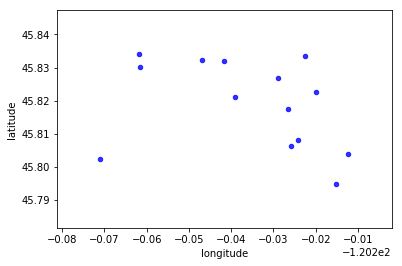

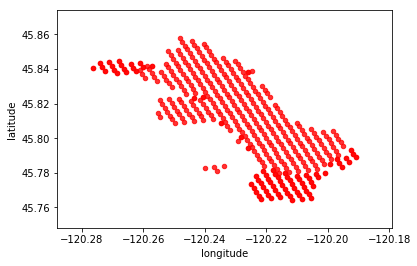

In [68]:
###Plotting area of Emissions Data vs NASA M6 Data together to view overlap. 
NM2005.plot(kind="scatter", x="longitude", y="latitude",alpha=0.8, color='b')
emyear2005.plot(kind="scatter", x="longitude", y="latitude",alpha=0.8, color='r')
plt.show

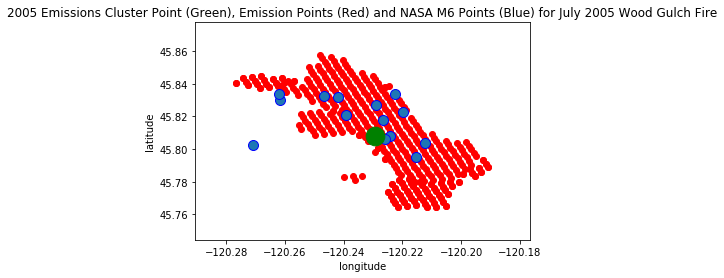

In [69]:
### Plotting both Emissions and NASA M6 for same geo area to determine overlap. 
LongNM, LatNM = NM2005['longitude'], NM2005['latitude']
LongEM05, LatEM05 = emyear2005['longitude'], emyear2005['latitude']
LongEMClust, LatEMClust = c25['longitude'], c25['latitude']
    
plt.scatter(LongEM05, LatEM05, color='r', edgecolors='r')
plt.scatter(LongNM, LatNM, s=100, edgecolors='b')
plt.scatter(LongEMClust, LatEMClust, s=350, color='g', edgecolors='g')

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('2005 Emissions Cluster Point (Green), Emission Points (Red) and NASA M6 Points (Blue) for July 2005 Wood Gulch Fire')
plt.show()

In [70]:
# Extract the data we're interested in
       lat, lon = cities['latd'], cities['longd']
       population, area = cities['population_total'], cities['area_total_km2']

       # Scatter the points, using size and color but no label
       plt.scatter(lon, lat, label=None,
                   c=np.log10(population), cmap='viridis',
                   s=area, linewidth=0, alpha=0.5)
       plt.axis(aspect='equal')
       plt.xlabel('longitude')
       plt.ylabel('latitude')
       plt.colorbar(label='log$_{10}$(population)')
       plt.clim(3, 7)

       # Here we create a legend:
       # we'll plot empty lists with the desired size and label
       for area in [100, 300, 500]:
           plt.scatter([], [], c='k', alpha=0.3, s=area,
                       label=str(area) + ' km$^2$')
       plt.legend(scatterpoints=1, frameon=False,
                  labelspacing=1, title='City Area')

       plt.title('California Cities: Area and Population');

IndentationError: unexpected indent (<ipython-input-70-24b4278e3b6c>, line 2)

# NASA J1V1 Data Review

In [ ]:
NASA_J1V1['year'] = NASA_J1V1['acq_date'].astype(str).str[0:4]

In [ ]:
NASA_J1V1.head()

In [ ]:
NASA_J1V1['year'].unique()

In [ ]:
NASA_J1V1.shape

In [ ]:
# matplotlib histogram
plt.hist(NASA_M6['brightness'], color = 'red', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(NASA_M6['brightness'], hist=True, kde=False, 
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Fire Brightness')
plt.xlabel('Brightness/Intensity')
plt.ylabel('Fire Instances')